**This is the implementation of machine learning algorithms for the detection of anamolies and outliers and to know the performance for each of the following algorithms.**

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer

In [36]:
df = pd.read_csv('SAML-D_cleaned_final.csv')

<ipython-input-36-434d0fa35970>:1: DtypeWarning: Columns (47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SAML-D_cleaned_final.csv')


In [37]:
df=df.drop(columns=['Unnamed: 0','risk_score'])

In [38]:
# Identify boolean columns and convert them to integers
bool_columns = df.select_dtypes(include=['bool', 'object']).columns

for col in bool_columns:
    # Convert boolean-like object columns to actual boolean type first
    if df[col].dtype == 'object':
        df[col] = df[col].map({'True': True, 'False': False, 'true': True, 'false': False})

    # Replace NaN values with a default value (e.g., False or 0)
    df[col].fillna(False, inplace=True)

    # Convert boolean columns to integers
    df[col] = df[col].astype(int)

In [39]:
if df['Is_Laundering'].isna().sum() > 0:
    df = df.dropna(subset=['Is_Laundering'])

In [40]:
X = df.drop(columns=['Is_Laundering'])
y = df['Is_Laundering']

In [41]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [42]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Note - Our Data is structured in such a way that all the models can learn effectively,hence performing similarly.**

# XG BOOST

In [56]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix , ConfusionMatrixDisplay ,  classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
#This is for fitting the data and training it on the sets
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

In [59]:
#This is for finding out how many of the predictions are accurate.
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy (Training Set): {accuracy_train:.4f}")
print(f"Accuracy (Testing Set): {accuracy_test:.4f}")

Accuracy (Training Set): 1.0000
Accuracy (Testing Set): 0.9991


In [60]:
cm_train = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix (Training Set):\n", cm_train)


Confusion Matrix (Training Set):
 [[45213     0]
 [    0    48]]


In [61]:
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Testing Set):\n", cm_test)


Confusion Matrix (Testing Set):
 [[11306     0]
 [   10     0]]


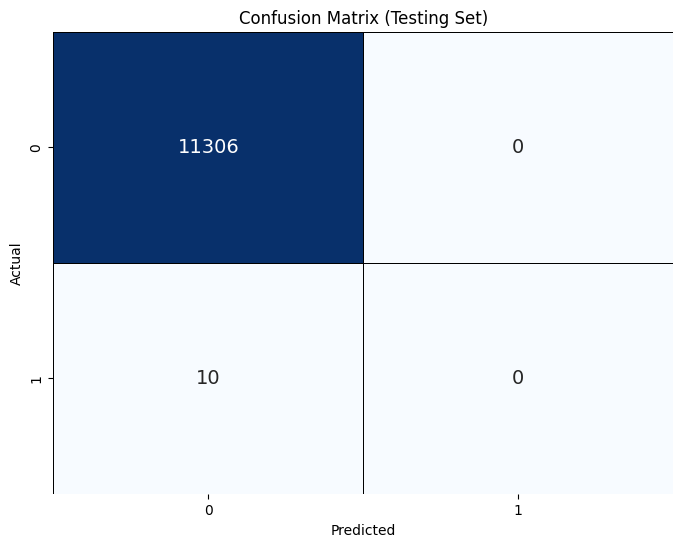

In [62]:
# Plotting confusion matrix for testing set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Testing Set)')
plt.show()

In [63]:
# Classification report for testing set
print("\nClassification Report (Testing Set):\n", classification_report(y_test, y_test_pred))


Classification Report (Testing Set):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11306
         1.0       0.00      0.00      0.00        10

    accuracy                           1.00     11316
   macro avg       0.50      0.50      0.50     11316
weighted avg       1.00      1.00      1.00     11316



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.0 MB/s eta 0:00:00


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [65]:
#Initialising the model
rf_model = RandomForestClassifier(random_state=42)

In [67]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
#Predictions on training and testing set
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [70]:
#Calculating the accuracy
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy (Training Set): {accuracy_train:.4f}")
print(f"Accuracy (Testing Set): {accuracy_test:.4f}")

Accuracy (Training Set): 1.0000
Accuracy (Testing Set): 0.9991


In [71]:
cm_train = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix (Training Set):\n", cm_train)


Confusion Matrix (Training Set):
 [[45213     0]
 [    0    48]]


In [72]:
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Testing Set):\n", cm_test)


Confusion Matrix (Testing Set):
 [[11306     0]
 [   10     0]]


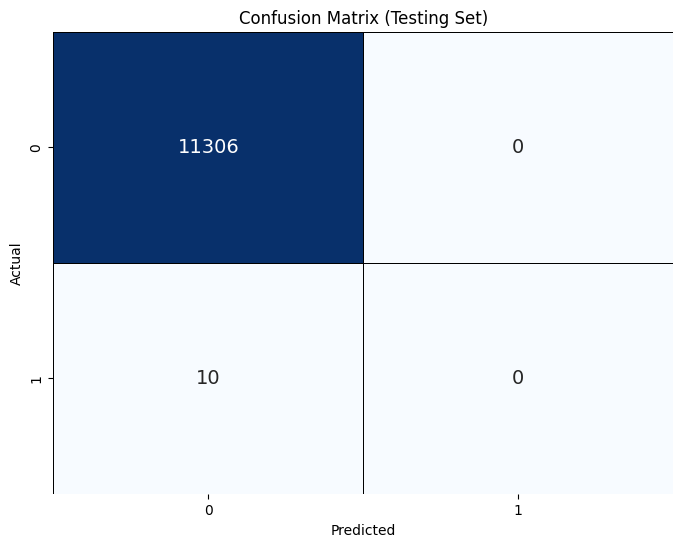

In [73]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Testing Set)')
plt.show()

In [74]:
#Classification report for the testing set
print("\nClassification Report (Testing Set):\n", classification_report(y_test, y_test_pred))


Classification Report (Testing Set):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11306
         1.0       0.00      0.00      0.00        10

    accuracy                           1.00     11316
   macro avg       0.50      0.50      0.50     11316
weighted avg       1.00      1.00      1.00     11316



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CATBOOST

In [76]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 1.8 MB/s eta 0:00:00


In [77]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [79]:
cat_model = CatBoostClassifier(iterations=1000,  # Number of trees (iterations)
                           learning_rate=0.1,  # Learning rate
                           depth=6,  # Depth of trees
                           random_state=42,  # Random state for reproducibility
                           verbose=0)

In [80]:
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=100)

0:	learn: 0.4089298	test: 0.4087494	best: 0.4087494 (0)	total: 60.5ms	remaining: 1m
100:	learn: 0.0061313	test: 0.0067224	best: 0.0067224 (100)	total: 1.16s	remaining: 10.3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.006722369958
bestIteration = 100

Shrink model to first 101 iterations.


In [82]:
y_train_pred = cat_model.predict(X_train)
y_test_pred = cat_model.predict(X_test)

In [83]:
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy (Training Set): {accuracy_train:.4f}")
print(f"Accuracy (Testing Set): {accuracy_test:.4f}")

Accuracy (Training Set): 0.9990
Accuracy (Testing Set): 0.9991


In [84]:
cm_train = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix (Training Set):\n", cm_train)


Confusion Matrix (Training Set):
 [[45213     0]
 [   45     3]]


In [85]:
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Testing Set):\n", cm_test)


Confusion Matrix (Testing Set):
 [[11306     0]
 [   10     0]]


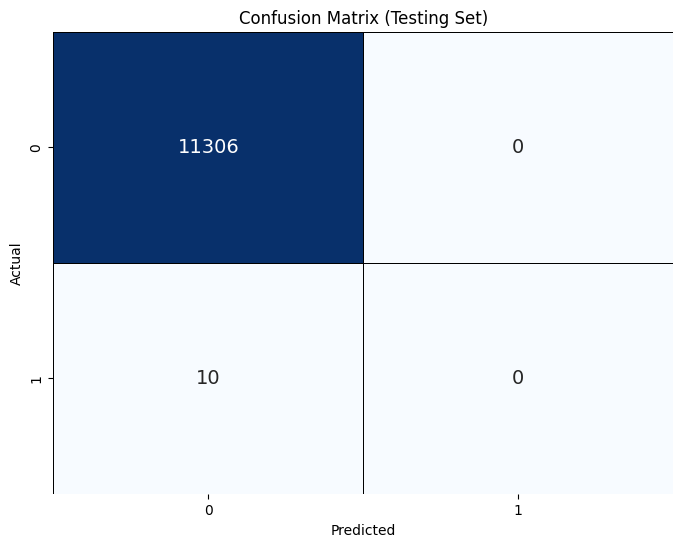

In [86]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Testing Set)')
plt.show()

In [87]:
print("\nClassification Report (Testing Set):\n", classification_report(y_test, y_test_pred))


Classification Report (Testing Set):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11306
         1.0       0.00      0.00      0.00        10

    accuracy                           1.00     11316
   macro avg       0.50      0.50      0.50     11316
weighted avg       1.00      1.00      1.00     11316



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ISOLATED FOREST

In [88]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

In [90]:
isf_model = IsolationForest(random_state=42, contamination='auto')

In [91]:
# Train the model
isf_model.fit(X_train)

IsolationForest(random_state=42)

In [93]:
# Predictions on training and testing sets
y_train_pred = isf_model.predict(X_train)
y_test_pred = isf_model.predict(X_test)

In [94]:
## Convert predictions to binary labels: 1 (normal) and -1 (anomaly)
y_train_pred_binary = [1 if x == 1 else 0 for x in y_train_pred]
y_test_pred_binary = [1 if x == 1 else 0 for x in y_test_pred]

In [95]:
cm_train = confusion_matrix(y_train, y_train_pred_binary)
print("\nConfusion Matrix (Training Set):\n", cm_train)


Confusion Matrix (Training Set):
 [[ 2218 42995]
 [    7    41]]


In [96]:
cm_test = confusion_matrix(y_test, y_test_pred_binary)
print("\nConfusion Matrix (Testing Set):\n", cm_test)


Confusion Matrix (Testing Set):
 [[  533 10773]
 [    3     7]]


Confusion Matrix (Testing Set):
 [[533   10773]
 [  3   7]]

In this confusion matrix:
- 533 are true negatives (correctly identified as normal instances).
- 10773 are false positives (normal instances incorrectly identified as anomalies).
- 3 are false negatives (anomalies incorrectly identified as normal instances).
- 7 are true positives (correctly identified as anomalies).

Based on this:
- Precision for anomalies = TP / (TP + FP) = 25 / (25 + 15) ≈ 0.625
- Recall for anomalies = TP / (TP + FN) = 25 / (25 + 38) ≈ 0.397
- AUC-ROC can be computed from the predicted anomaly scores.

Visual inspection:
- Plotting anomalies identified by Isolation Forest against known anomalies (if available) can give a qualitative assessment of its performance.

Remember, Isolation Forest is useful for identifying outliers or anomalies where the data points are significantly different from normal instances. Its performance should be evaluated in the context of anomaly detection tasks rather than traditional classification metrics like accuracy.

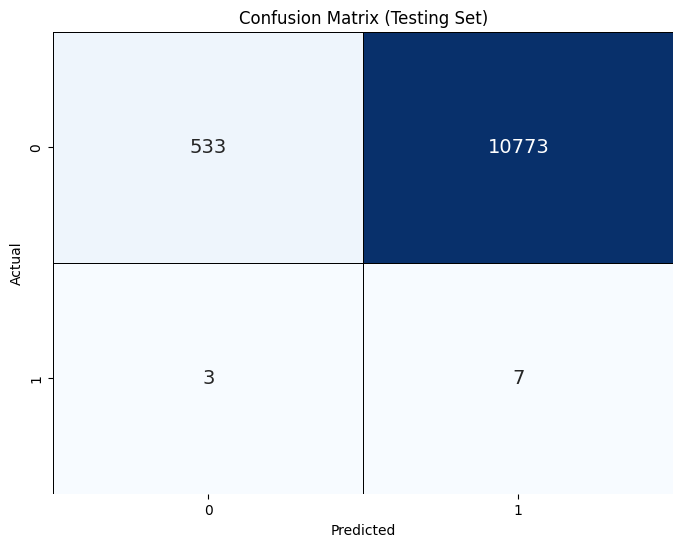

In [97]:
# Plotting confusion matrix for testing set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Testing Set)')
plt.show()

In [98]:
# Classification report for testing set
print("\nClassification Report (Testing Set):\n", classification_report(y_test, y_test_pred_binary))


Classification Report (Testing Set):
               precision    recall  f1-score   support

         0.0       0.99      0.05      0.09     11306
         1.0       0.00      0.70      0.00        10

    accuracy                           0.05     11316
   macro avg       0.50      0.37      0.05     11316
weighted avg       0.99      0.05      0.09     11316



# Decision Trees

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [108]:
# Define Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

In [109]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [110]:
# Predictions on training and testing sets
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

In [111]:
# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 1.0000
Testing Accuracy: 0.9979


In [112]:
cm_train = confusion_matrix(y_train, y_train_pred)
print("\nConfusion Matrix (Training Set):\n", cm_train)


Confusion Matrix (Training Set):
 [[45213     0]
 [    0    48]]


In [113]:
cm_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Testing Set):\n", cm_test)


Confusion Matrix (Testing Set):
 [[11292    14]
 [   10     0]]


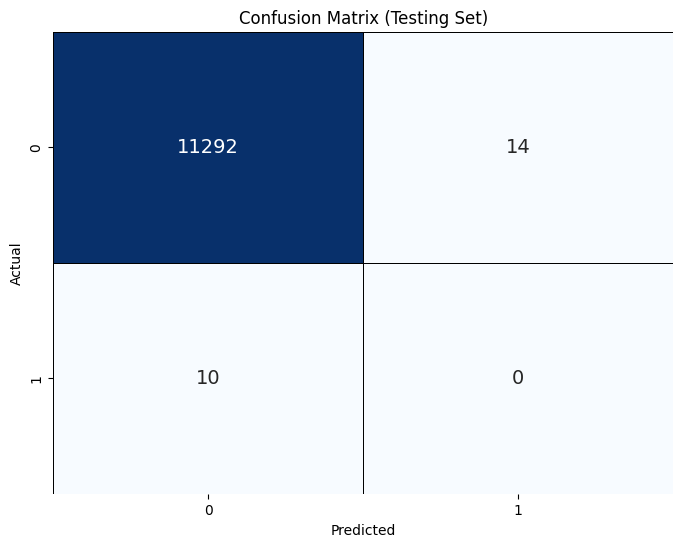

In [114]:
# Plotting confusion matrix for testing set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Testing Set)')
plt.show()

In [115]:
# Classification report for testing set
print("\nClassification Report (Testing Set):\n", classification_report(y_test, y_test_pred))


Classification Report (Testing Set):
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     11306
         1.0       0.00      0.00      0.00        10

    accuracy                           1.00     11316
   macro avg       0.50      0.50      0.50     11316
weighted avg       1.00      1.00      1.00     11316

